In [1]:
import numpy as np
import tensorflow as tf
import keras
from keras import layers

In [2]:
inputs = keras.Input(shape=(784,))

In [3]:
inputs.shape

TensorShape([None, 784])

In [4]:
inputs.dtype

tf.float32

In [5]:
dense = layers.Dense(64, activation='relu')
x=dense(inputs)

In [6]:
x=layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(10)(x)

In [7]:
model = keras.Model(inputs, outputs, name="mnist_model")

In [8]:
model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


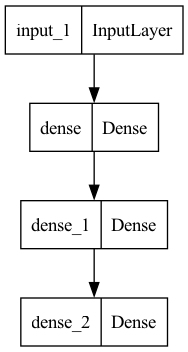

In [9]:
keras.utils.plot_model(model, 'my_first_model.png')

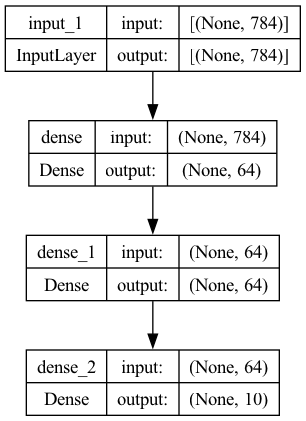

In [10]:
keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)

In [11]:
(x_train, y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [12]:
x_train=x_train.reshape(60000,784).astype('float32')/255
x_test=x_test.reshape(10000,784).astype('float32')/255

In [13]:
model.compile(loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=keras.optimizers.RMSprop(),
              metrics=keras.metrics.SparseCategoricalAccuracy())
history = model.fit(x_train, y_train, epochs=2, batch_size=64, validation_split=0.2)
test_scores = model.evaluate(x_test, y_test, verbose=2)
print('Test loss :' , test_scores[0])
print('Test Accuracy :' , test_scores[1])

Epoch 1/2
750/750 [==============================] - 1s 922us/step - loss: 0.3560 - sparse_categorical_accuracy: 0.8991 - val_loss: 0.2011 - val_sparse_categorical_accuracy: 0.9408
Epoch 2/2
750/750 [==============================] - 1s 761us/step - loss: 0.1685 - sparse_categorical_accuracy: 0.9507 - val_loss: 0.1426 - val_sparse_categorical_accuracy: 0.9595
313/313 - 0s - loss: 0.1394 - sparse_categorical_accuracy: 0.9576 - 121ms/epoch - 385us/step
Test loss : 0.13938921689987183
Test Accuracy : 0.9575999975204468


In [15]:
history.history

{'loss': [0.3560323119163513, 0.16847538948059082],
 'sparse_categorical_accuracy': [0.8990625143051147, 0.9507083296775818],
 'val_loss': [0.20109723508358002, 0.142571359872818],
 'val_sparse_categorical_accuracy': [0.940833330154419, 0.9595000147819519]}

In [16]:
def get_model():
    inputs = keras.Input(shape=(128,))
    outputs = layers.Dense(1)(inputs)
    return keras.Model(inputs, outputs)

model1 = get_model()
model2 = get_model()
model3 = get_model()

inputs = keras.Input(shape=(128,))
y1 = model1(inputs)
y2 = model2(inputs)
y3 = model3(inputs)
outputs = layers.average([y1,y2,y3])
ensemble_model = keras.Model(inputs, outputs, name='ensemble_model')

In [17]:
ensemble_model.summary()

Model: "ensemble_model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 128)]                0         []                            
                                                                                                  
 model (Functional)          (None, 1)                    129       ['input_5[0][0]']             
                                                                                                  
 model_1 (Functional)        (None, 1)                    129       ['input_5[0][0]']             
                                                                                                  
 model_2 (Functional)        (None, 1)                    129       ['input_5[0][0]']             
                                                                                     

In [18]:
num_tags=12
num_words=10000
num_departments=4

title_input = keras.Input(shape=(None,), name='title')
body_input = keras.Input(shape=(None,), name='body')
tags_input = keras.Input(shape=(12,), name='tag')

title_features = layers.Embedding(num_words, 64)(title_input)
body_features = layers.Embedding(num_words, 64)(body_input)

title_features = layers.LSTM(128)(title_features)
body_features = layers.LSTM(32)(body_features)

x = layers.concatenate( [title_features, body_features, tags_input])

priority_pred = layers.Dense(1, name='priority')(x)
department_pred = layers.Dense(num_departments, name='department')(x)

model = keras.Model(inputs=[title_input, body_input, tags_input], outputs=[priority_pred, department_pred])
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 title (InputLayer)          [(None, None)]               0         []                            
                                                                                                  
 body (InputLayer)           [(None, None)]               0         []                            
                                                                                                  
 embedding (Embedding)       (None, None, 64)             640000    ['title[0][0]']               
                                                                                                  
 embedding_1 (Embedding)     (None, None, 64)             640000    ['body[0][0]']                
                                                                                            

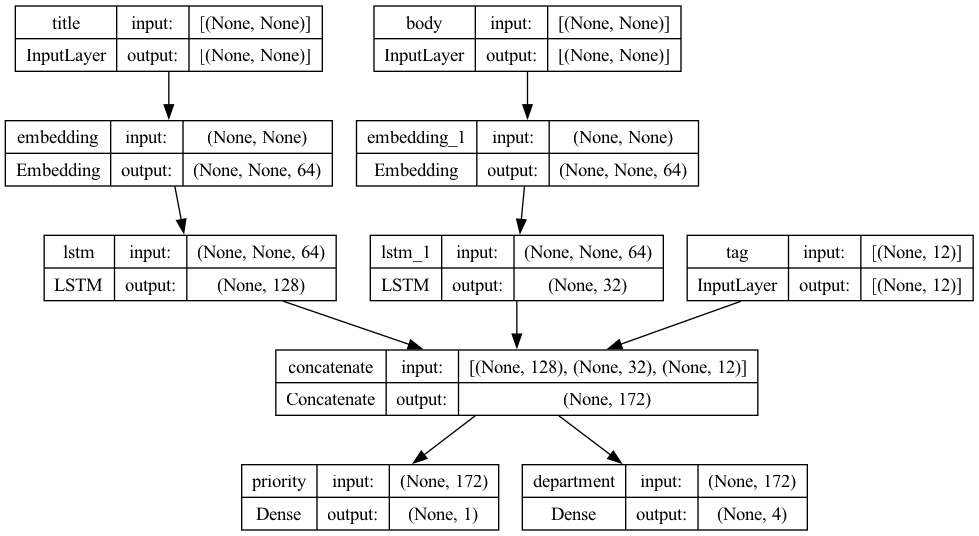

In [19]:
keras.utils.plot_model(model, show_shapes=True)

In [33]:
model.compile(optimizer=keras.optimizers.RMSprop(1e-3),
              loss=[keras.losses.BinaryCrossentropy(from_logits=True), keras.losses.CategoricalCrossentropy(from_logits=True)],
              loss_weights=[1,0.2]
             )

In [34]:
title_data = np.random.randint(num_words, size=(1280,10))
body_data = np.random.randint(num_words, size=(1280,100))
tag_data = np.random.randint(2, size=(1280,num_tags)).astype("float32")

In [35]:
priority_data = np.random.randint(2, size=(1280,1))
department_data = np.random.randint(2, size=(1280,num_departments))

In [37]:
history=model.fit({'title':title_data,'body':body_data,'tag':tag_data},
          {'priority':priority_data,'department':department_data},
          epochs=2,
          batch_size=32
         )

Epoch 1/2
40/40 [==============================] - 1s 13ms/step - loss: 1.2921 - priority_loss: 0.6991 - department_loss: 2.9650
Epoch 2/2
40/40 [==============================] - 1s 13ms/step - loss: 1.2842 - priority_loss: 0.7010 - department_loss: 2.9160


In [38]:
history.history

{'loss': [1.2921198606491089, 1.284194827079773],
 'priority_loss': [0.6991224884986877, 0.7009857296943665],
 'department_loss': [2.9649858474731445, 2.916046619415283]}